# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [87]:
# student 1: Netanel Musayev (5535)

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [88]:
import pandas as pd

In [89]:
# Loading datasets

train_data = pd.read_csv('./datasets/titanic_train.csv')
test_data = pd.read_csv('./datasets/titanic_test.csv')

In [90]:
# Tests

print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
# Statistics
print("Basic statistics:")
print(train_data.describe())

Basic statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.00000

In [93]:
# Number of passengers who survived
survival_count = train_data['Survived'].value_counts()
print("Passengers who survived:")
print(survival_count)

Passengers who survived:
Survived
0    431
1    281
Name: count, dtype: int64


C:\Users\netan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


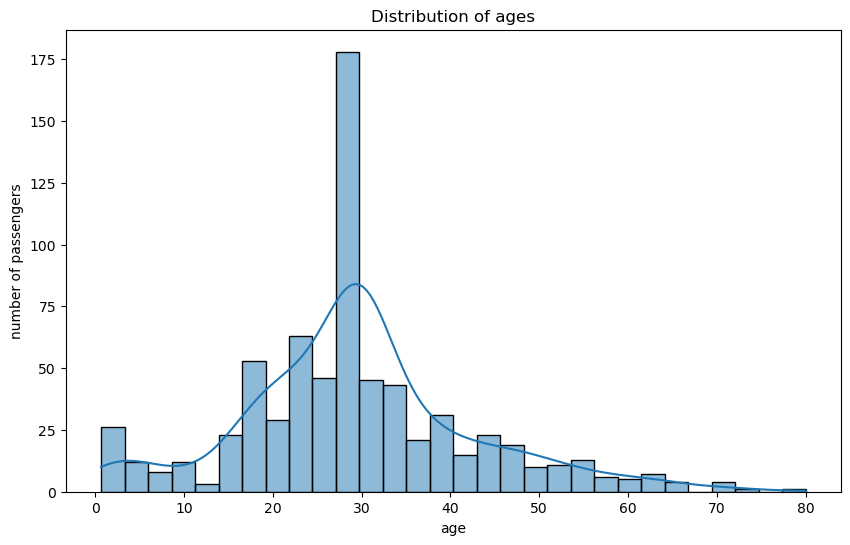

In [94]:
# Chart describes distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of ages')
plt.xlabel('age')
plt.ylabel('number of passengers')
plt.show()

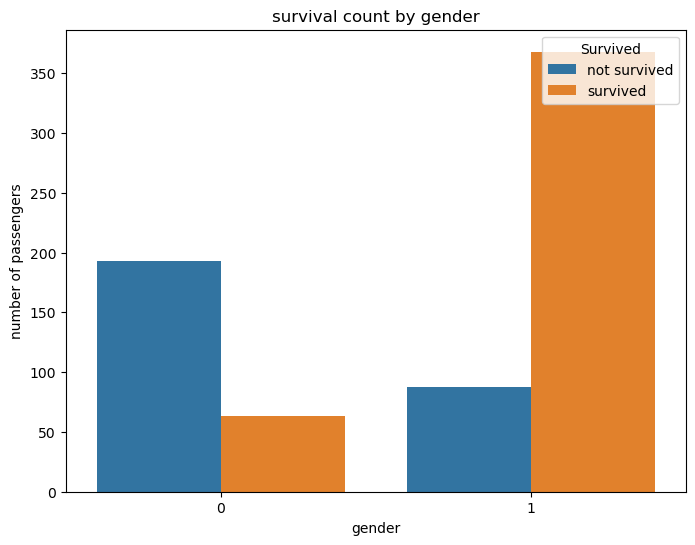

In [95]:
# Preprocessing
train_data['Survived'] = train_data['Survived'].map({0: 'not survived', 1: 'survived'})

# Chart describes survival cout by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('survival count by gender')
plt.xlabel('gender')
plt.ylabel('number of passengers')
plt.legend(title='Survived', loc='upper right', labels=['not survived', 'survived'])
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [96]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [97]:
# Feature engineering - converting categorical variables
le = LabelEncoder()
train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data['Embarked'].fillna('S', inplace=True)
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])

In [98]:
# Selecting features and target
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_data['Survived']

In [99]:
# Fill missing age values with the median using .loc to avoid the warning
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].median())

In [100]:
# Define models and hyperparameters for Grid Search
models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC()
}

param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

In [101]:
# Performing Grid Search with Cross-Validation
best_models = {}
best_params = []
best_scores = []

for name, model in models.items():
    print(f"Running Grid Search for {name}")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='f1_macro')
    grid_search.fit(X, y)

    # Save the best estimator, params and scores
    best_models[name] = grid_search.best_estimator_
    best_params.append(grid_search.best_params_)  # Store the best parameters
    best_scores.append(grid_search.best_score_)  # Store the best score

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_}")

Running Grid Search for RandomForest
Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 100}
Best score for RandomForest: 0.8020304226068274
Running Grid Search for SVC
Best parameters for SVC: {'C': 0.1, 'kernel': 'linear'}
Best score for SVC: 0.7745978836180488


In [ ]:
# Summarize results in DataFrame
results = pd.DataFrame({
    'Model': list(best_models.keys()),
    'Best Parameters': best_params,
    'Best Score': best_scores
})

print(results)

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [104]:
### part 4

# Retrain the best model
best_model = best_models['RandomForest']  # Use the best performing model

# Combine feature engineering 
train_data['Sex'] = le.fit_transform(train_data['Sex'])
train_data['Embarked'].fillna('S', inplace=True)
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
X_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train_data['Survived']
X_train.loc[:, 'Age'] = X_train['Age'].fillna(X_train['Age'].median())  

# Retrain the model on the full training set
best_model.fit(X_train, y_train)

# Make Predictions
train_predictions = best_model.predict(X_train)

# Calculate F1 Score
from sklearn.metrics import f1_score
f1_train = f1_score(y_train, train_predictions, average='macro')
print(f"F1 Score on train data (Best Model): {f1_train:.4f}")

F1 Score on train data (Best Model): 0.9794


## Part 5 - Apply on test and show model performance estimation

In [105]:
### part 5

# Apply feature engineering 
test_data['Sex'] = le.transform(test_data['Sex'])
test_data['Embarked'] = test_data['Embarked'].fillna('S')
test_data['Embarked'] = le.transform(test_data['Embarked'])
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_test.loc[:, 'Age'] = X_test['Age'].fillna(X_test['Age'].median()) 

# Make predictions
test_predictions = best_model.predict(X_test)

# Include the predictions in the test set for display
test_data_with_predictions = test_data.copy()
test_data_with_predictions['Predicted_Survived'] = test_predictions

# Display the first 5 rows of the test 
print(test_data_with_predictions.head(5))

# Save the predictions to CSV
output = pd.DataFrame({
    'Pclass': test_data['Pclass'],
    'Sex': test_data['Sex'],
    'Age': test_data['Age'],
    'SibSp': test_data['SibSp'],
    'Parch': test_data['Parch'],
    'Fare': test_data['Fare'],
    'Embarked': test_data['Embarked'],
    'Predicted_Survived': test_predictions
})
output.to_csv('output/test_predictions_with_features.csv', index=False)
print("Predictions saved to test_predictions_with_features.csv.")

   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived  \
0       3    1  35.000000      0      0   7.0500         0         0   
1       3    1  30.000000      0      0   7.2500         0         0   
2       3    1  29.699118      0      0  14.5000         0         0   
3       3    0  21.000000      0      0   7.7500         2         0   
4       3    1  32.000000      0      0  56.4958         0         1   

  Predicted_Survived  
0       not survived  
1       not survived  
2       not survived  
3           survived  
4           survived  
Predictions saved to test_predictions_with_features.csv.
